### Sample program for Neural Network  

#### Import libraries  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import  os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True' 

2022-01-16 17:06:42.650574: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-16 17:06:42.650606: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


#### Set data    

In [2]:
dat = np.array([[0,0,0],[0,1,0],[1,0,0],[1,1,1]])
data_train = dat[:, :-1]
class_train = dat[:, -1]
print('data:', data_train.shape)
print('class:', class_train.shape)

data: (4, 2)
class: (4,)


#### Making model and exec training  

In [3]:
%%time

K.clear_session()
inputs = Input(shape=(2,))
x = Dense(5, activation='relu')(inputs)
x = Dense(5, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs, outputs)

model.compile(optimizer='sgd', loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(data_train, class_train,
          epochs=1000, batch_size=1)

2022-01-16 17:06:44.457398: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-16 17:06:44.457430: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-16 17:06:44.457452: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (anhvu): /proc/driver/nvidia/version does not exist
2022-01-16 17:06:44.457696: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-16 17:06:44.834375: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR 

Epoch 1/1000
4/4 [==============================] - 1s 1ms/step - loss: 0.6767 - accuracy: 1.0000
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6695 - accuracy: 1.0000
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 1.0000
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 1.0000
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6490 - accuracy: 1.0000
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6425 - accuracy: 1.0000
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6362 - accuracy: 1.0000
Epoch 8/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.6301 - accuracy: 1.0000
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6241 - accuracy: 1.0000
Epoch 10/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.6182 - accuracy: 1.0000
Epoch 11/1000
4/4 [

#### Prediction for training data  

In [4]:
pred = model.predict(data_train)
print(pred)

[[0.00123987]
 [0.12486029]
 [0.00508675]
 [0.98761547]]


#### Teacher signal for separating hyperplane  

In [5]:
t1 = data_train[ class_train==1 ]
t0 = data_train[ class_train==0 ]
t1_x = t1[:, 0]
t1_y = t1[:, 1]
t0_x = t0[:, 0]
t0_y = t0[:, 1]

#### Grid points for separating hyperplane  

In [6]:
g = np.loadtxt('grid01_21x21.csv', delimiter=',')
print(g.shape)
print(model.predict(g).shape)
pred_g = model.predict(g)[:, 0]
g1 = g[ pred_g >= 0.5 ]
g0 = g[ pred_g < 0.5 ]
g1_x = g1[:, 0]
g1_y = g1[:, 1]
g0_x = g0[:, 0]
g0_y = g0[:, 1]

(441, 2)
(441, 1)


#### Plot of separating hyperplane  

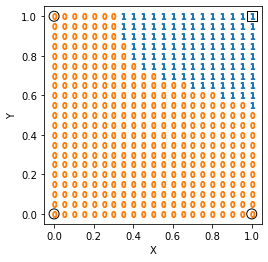

In [7]:
plt.scatter(t1_x, t1_y, marker='s', facecolor='none', edgecolor='black', s=100)
plt.scatter(t0_x, t0_y, marker='o', facecolor='none', edgecolor='black', s=100)
plt.scatter(g1_x, g1_y, marker='$1$')
plt.scatter(g0_x, g0_y, marker='$0$')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()